In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
housing_combined_data_df = pd.read_csv(r"https://raw.githubusercontent.com/chaenii989/Final_Project_What_is_Affecting_US_Housing_Market/main/etl/housing_combined_data.csv")

In [3]:
# Univariate Linear Regression for Time-Series Data with Machine Learning

def UnivariateLinearRegression(df):

    from sklearn.linear_model import LinearRegression

    last = len(df.iloc[:,1])
    
    list = df.iloc[:,1].astype("float").to_list()
    x_list = [0]
    for x in list:
        x_list.append(x)

    y_list = df.iloc[:,1].astype("float").to_list()
    y_list.append(0)

    data = {"x" : x_list, "y" : y_list}

    ml_df = pd.DataFrame(data)
    ml_df = ml_df.drop(0, inplace=False).drop(last, inplace=False)

    # Assign the data to X and y
    # Note: Sklearn requires a two-dimensional array of values, so we use reshape to create this
    X = ml_df.x.values.reshape(-1, 1)
    y = ml_df.y.values.reshape(-1, 1)
    print("Shape: ", X.shape, y.shape)

    # Fit the model to the data. 
    # Note: This is the training step where you fit the line to the data.
    model = LinearRegression()
    model.fit(X, y)

    # Print the coefficient and the intercept for the model
    print('Weight coefficients: ', model.coef_)
    print('Y-Axis Intercept: ', model.intercept_)

    # X value min & max
    # Note: we have to transform our min and max values, so they are in the format: array([[ 1.17]])
    # This is the required format for `model.predict()`
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Y value predicted min & max
    # Calculate the y_min and y_max using model.predict and x_min and x_max
    y_min = model.predict(x_min)
    y_max = model.predict(x_max)

    print("---------------------")
    print("PREDICTIONS")
    print("---------------------")
    print(f"Predicted Min y Value: {y_min}")
    print(f"Predicted Max y Value: {y_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    print("---------------------")
    print(f"Actual Output: {y[0]}")
    print(f"Predicted Output: {predictions[0]}")
    print(f"Prediction Error: {predictions[0]-y[0]}")
    print("---------------------")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")
    print("---------------------")

    # Fit line
    # Plot X and y using plt.scatter
    # Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
    plt.scatter(X, y, c='blue')
    plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
    plt.title('Model Fit Line')
    plt.show

    #Build predicted values dataframe
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    print("Predicted Data Frame")
    print(predicted_df.head(5))
    print(predicted_df.tail(5))

    return predicted_df

In [4]:
# Multivariate Linear Regression for Time-Series Data with Machine Learning

def MultivariateLinearRegression(df, target_column):

    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    df["y_actual_output"] = target_column
    df = df.set_index("date")

    data = {}

    last_col = len(df.iloc[0,:])
    print(f"Number of Columns: {last_col}")

    for i in range(0, (last_col - 1)):
        list = df.iloc[:, i].astype("float").to_list()
        x_list = [0]
        for x in list:
            x_list.append(x)
        data[f'X{i+1}'] = f'X{i+1}'
        data[f'X{i+1}'] = x_list

    y_list = df.iloc[:, last_col - 1].astype("float").to_list()
    y_list.append(0)
    data['Y'] = y_list

    ml_df = pd.DataFrame(data)

    last_row = len(ml_df.iloc[:,1])
    last = len(ml_df.iloc[0,:])
    ml_df = ml_df.drop(0, inplace=False).drop(last_row - 1, inplace=False)
    print("Machine Learning Data Set")
    print(ml_df.head(5))
    print(ml_df.tail(5))

    # Assign the data to X and y
    X = ml_df.iloc[:,0:last-1]
    y = ml_df["Y"].values.reshape(-1, 1)
    print("Shape: ", X.shape, y.shape)

    # Use train_test_split to create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # Create the model using LinearRegression
    model = LinearRegression()

    # Fitting our model with all of our features in X
    model.fit(X, y)
    score = model.score(X, y)
    print(f"R2 Score: {score}")

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print(f"Training Score: {training_score}")
    print(f"Testing Score: {testing_score}")

    # Print the coefficient and the intercept for the model
    print('Weight coefficients: ', model.coef_)
    print('Y-Axis Intercept: ', model.intercept_)

    # X value min & max
    # Note: we have to transform our min and max values, so they are in the format: array([[ 1.17]])
    # This is the required format for `model.predict()`
    x_min = np.array([[X.min()]])
    x_max = np.array([[X.max()]])
    print(f"Min X Value: {x_min}")
    print(f"Max X Value: {x_max}")

    # Y value predicted min & max
    # Calculate the y_min and y_max using model.predict and x_min and x_max
    # y_min = model.predict(x_min)
    # y_max = model.predict(x_max)

    # print("---------------------")
    # print("PREDICTIONS")
    # print("---------------------")
    # print(f"Predicted Min y Value: {y_min}")
    # print(f"Predicted Max y Value: {y_max}")

    # Predictions
    predictions = model.predict(X)
    prediction_error = predictions - y
    predicted_output = predictions
    actual_output = y
    max_error = max(prediction_error)
    min_error = min(prediction_error)

    # print("---------------------")
    print(f"Actual Output: {y[0]}")
    print(f"Predicted Output: {predictions[0]}")
    print(f"Prediction Error: {predictions[0]-y[0]}")
    # print("---------------------")
    print(f"Max Prediction Error: {max_error}")
    print(f"Min Prediction Error: {min_error}")
    # print("---------------------")

    # Plot the Residuals for the Training and Testing data
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
    plt.legend()
    plt.hlines(y=0, xmin=y.min(), xmax=y.max())
    plt.title("Residual Plot")

    #Build predicted values dataframe
    df = df.reset_index()
    predicted_df = df.drop(axis = 0, index = 0, inplace = False)
    predicted_df["predicted"] = predicted_output
    predicted_df["error"] = prediction_error

    # print("Predicted Data Frame")
    # print(predicted_df.head(5))
    # print(predicted_df.tail(5))

    return predicted_df

In [5]:
housing_combined_data_df

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,1990-01-01,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333
...,...,...,...,...,...,...,...,...,...,...,...
121,2020-04-01,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000
122,2020-07-01,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333
123,2020-10-01,2.76,1575.333333,358700.0,65.7,147.59,3.766667,1683.000000,216.40,1246.333333,1328.666667
124,2021-01-01,2.88,1599.000000,347500.0,65.6,183.76,4.100000,1788.000000,266.97,1293.333333,1390.666667


In [6]:
housing_combined_data_df = housing_combined_data_df.dropna()
housing_combined_data_df

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed
0,1990-01-01,10.13,1425.666667,123900.0,64.1,55.58,7.466667,1441.000000,116.47,891.333333,1401.666667
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333
...,...,...,...,...,...,...,...,...,...,...,...
120,2020-01-01,3.52,1485.000000,329000.0,65.3,101.60,5.566667,1470.000000,210.60,1209.000000,1283.000000
121,2020-04-01,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000
122,2020-07-01,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333
123,2020-10-01,2.76,1575.333333,358700.0,65.7,147.59,3.766667,1683.000000,216.40,1246.333333,1328.666667


<ipython-input-4-27a88fd5cab0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_actual_output"] = target_column


Number of Columns: 11
Machine Learning Data Set
      X1           X2        X3    X4     X5        X6           X7      X8  \
1  10.13  1425.666667  123900.0  64.1  55.58  7.466667  1441.000000  116.47   
2  10.32  1212.333333  126800.0  63.9  56.64  8.133333  1103.666667  117.47   
3  10.10  1132.000000  117000.0  63.9  54.72  8.133333  1041.000000  117.87   
4   9.96  1042.666667  121500.0  64.0  51.38  8.466667   909.000000  117.07   
5   9.50   894.666667  120000.0  64.0  51.48  8.200000   850.000000  116.47   

           X9          X10         Y  
1  891.333333  1401.666667  126800.0  
2  858.666667  1315.333333  117000.0  
3  812.333333  1304.666667  121500.0  
4  756.333333  1234.333333  120000.0  
5  701.333333  1138.333333  119900.0  
       X1           X2        X3    X4      X5        X6           X7      X8  \
120  3.70  1405.000000  327100.0  65.0   96.33  5.433333  1490.333333  206.27   
121  3.52  1485.000000  329000.0  65.3  101.60  5.566667  1470.000000  210.60   


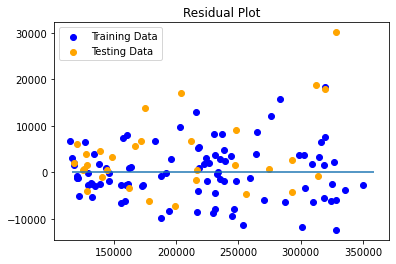

In [7]:
predicted_housing_combined_data_df = MultivariateLinearRegression(housing_combined_data_df, housing_combined_data_df["avg_home_price"])

In [8]:
predicted_housing_combined_data_df

,date,interest_rate,units_authorized_started,avg_home_price,homeownership_rate,lumber_price_index,house_supply,new_housing_permits,steel_price_index,under_construction,units_completed,y_actual_output,predicted,error
1,1990-04-01,10.32,1212.333333,126800.0,63.9,56.64,8.133333,1103.666667,117.47,858.666667,1315.333333,126800.0,120716.385499,-6083.614501
2,1990-07-01,10.10,1132.000000,117000.0,63.9,54.72,8.133333,1041.000000,117.87,812.333333,1304.666667,117000.0,122134.760840,5134.760840
3,1990-10-01,9.96,1042.666667,121500.0,64.0,51.38,8.466667,909.000000,117.07,756.333333,1234.333333,121500.0,114793.299695,-6706.700305
4,1991-01-01,9.50,894.666667,120000.0,64.0,51.48,8.200000,850.000000,116.47,701.333333,1138.333333,120000.0,118477.503169,-1522.496831
5,1991-04-01,9.52,1011.000000,119900.0,64.1,56.66,7.100000,957.000000,114.47,662.000000,1085.333333,119900.0,117978.859194,-1921.140806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2020-01-01,3.52,1485.000000,329000.0,65.3,101.60,5.566667,1470.000000,210.60,1209.000000,1283.000000,329000.0,326765.009502,-2234.990498
121,2020-04-01,3.24,1085.666667,322600.0,68.1,100.00,5.400000,1212.000000,203.90,1186.666667,1204.000000,322600.0,328504.781506,5904.781506
122,2020-07-01,2.95,1440.333333,337500.0,67.3,145.00,3.533333,1551.000000,202.17,1209.666667,1327.333333,337500.0,319524.352526,-17975.647474
123,2020-10-01,2.76,1575.333333,358700.0,65.7,147.59,3.766667,1683.000000,216.40,1246.333333,1328.666667,358700.0,328550.890749,-30149.109251


(100000.0, 400000.0)

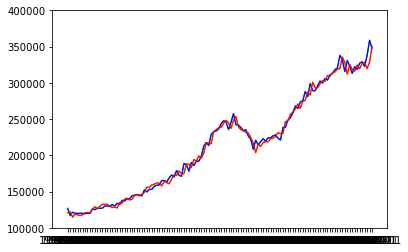

In [20]:
#Line Plot

#numpy functions
x_axis = predicted_housing_combined_data_df["date"].to_list()
y_axis = predicted_housing_combined_data_df["predicted"].to_list()
y_axis1 = predicted_housing_combined_data_df["y_actual_output"].to_list()


#Graphing functions (single or multiple lines)
plt.plot(x_axis, y_axis1)
plt.plot(x_axis, y_axis) #second line

#Asthetics
#Line plots (tuples)
line_one,=plt.plot(x_axis,y_axis1,color='blue',linewidth=1,label="Line One")
line_two,=plt.plot(x_axis,y_axis,color='red',linewidth=1,label="Line Two")

# Horizontal line (0.25 transparency)
# plt.hlines(0, 0, 10, #alpha=0.25)
# Set your x and y limits
# plt.xlim(0, 10)
plt.ylim(100000, 400000)

In [12]:
uni_df = predicted_housing_combined_data_df[["date", "predicted"]]
uni_df = uni_df.reset_index(drop=True)
uni_df

,date,predicted
0,1990-04-01,120716.385499
1,1990-07-01,122134.760840
2,1990-10-01,114793.299695
3,1991-01-01,118477.503169
4,1991-04-01,117978.859194
...,...,...
119,2020-01-01,326765.009502
120,2020-04-01,328504.781506
121,2020-07-01,319524.352526
122,2020-10-01,328550.890749


Shape:  (123, 1) (123, 1)
Weight coefficients:  [[1.00448638]]
Y-Axis Intercept:  [911.03251745]
Min X Value: [[114793.29969477]]
Max X Value: [[335577.8579093]]
---------------------
PREDICTIONS
---------------------
Predicted Min y Value: [[116219.33850682]]
Predicted Max y Value: [[337994.42001437]]
---------------------
Actual Output: [122134.76084006]
Predicted Output: [122168.99752149]
Prediction Error: [34.23668143]
---------------------
Max Prediction Error: [18376.9906533]
Min Prediction Error: [-19288.91094044]
---------------------
Predicted Data Frame
         date      predicted        error
1  1990-07-01  122168.997521    34.236681
2  1990-10-01  123593.736232  8800.436537
3  1991-01-01  116219.338507 -2258.164662
4  1991-04-01  119920.070716  1941.211522
5  1991-07-01  119419.189634  2554.566542
           date      predicted         error
119  2020-01-01  321779.134978  -4985.874525
120  2020-04-01  329142.033826    637.252320
121  2020-07-01  330889.611107  11365.25858

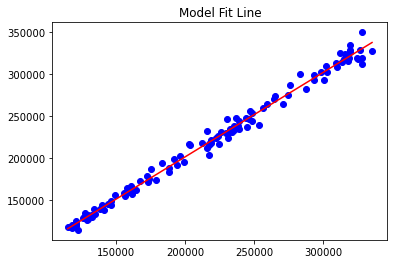

In [13]:
predicted_uni_df = UnivariateLinearRegression(uni_df)

In [14]:
predicted_uni_df

,date,predicted,error
1,1990-07-01,122168.997521,34.236681
2,1990-10-01,123593.736232,8800.436537
3,1991-01-01,116219.338507,-2258.164662
4,1991-04-01,119920.070716,1941.211522
5,1991-07-01,119419.189634,2554.566542
...,...,...,...
119,2020-01-01,321779.134978,-4985.874525
120,2020-04-01,329142.033826,637.252320
121,2020-07-01,330889.611107,11365.258581
122,2020-10-01,321868.892515,-6681.998234


(100000.0, 400000.0)

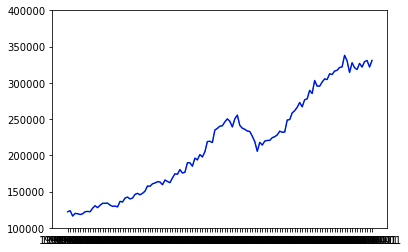

In [21]:
#Line Plot

#numpy functions
x_axis = predicted_uni_df["date"].to_list()
y_axis = predicted_uni_df["predicted"].to_list()



#Graphing functions (single or multiple lines)
plt.plot(x_axis, y_axis)

#Asthetics
#Line plots (tuples)
line_one,=plt.plot(x_axis,y_axis,color='blue',linewidth=1,label="Line One")


# Horizontal line (0.25 transparency)
# plt.hlines(0, 0, 10, #alpha=0.25)
# Set your x and y limits
# plt.xlim(0, 10)
plt.ylim(100000, 400000)